# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

My manager demand me to analyze movement usd to idr from march to august 2024. Therefore, i do web scrapping to get the data that I want and I analyze it to give a useful analysis for my company.    

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [17]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [18]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [19]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*

In [20]:
table = soup.find('table',attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
  


Next, we need to find the row length.

In [21]:
row = table.find_all('span', attrs={'class':'w'})
row_length = len(row)
row_length

130

Do the scrapping process here. This is for getting period and usd to idr nominal to python. I get data from March to August

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [73]:
temp = []  # Initiating a tuple

for i in range(0,row_length):
    #get usd to idr period
    period = table.find_all('a', attrs={'class':'w'})[i].text
    #get usd to idr nominal
    kurs_dolar = table.find_all('span', attrs={'class':'w'})[i].text
    temp.append((period,kurs_dolar))            

temp = temp[::-1]
temp[60:129]

[('2024-5-27', '1 USD = 16,073 IDR'),
 ('2024-5-28', '1 USD = 16,115 IDR'),
 ('2024-5-29', '1 USD = 16,252 IDR'),
 ('2024-5-30', '1 USD = 16,233 IDR'),
 ('2024-5-31', '1 USD = 16,255 IDR'),
 ('2024-6-3', '1 USD = 16,210 IDR'),
 ('2024-6-4', '1 USD = 16,282 IDR'),
 ('2024-6-5', '1 USD = 16,312 IDR'),
 ('2024-6-6', '1 USD = 16,239 IDR'),
 ('2024-6-7', '1 USD = 16,277 IDR'),
 ('2024-6-10', '1 USD = 16,309 IDR'),
 ('2024-6-11', '1 USD = 16,306 IDR'),
 ('2024-6-12', '1 USD = 16,246 IDR'),
 ('2024-6-13', '1 USD = 16,283 IDR'),
 ('2024-6-14', '1 USD = 16,487 IDR'),
 ('2024-6-17', '1 USD = 16,467 IDR'),
 ('2024-6-18', '1 USD = 16,376 IDR'),
 ('2024-6-19', '1 USD = 16,391 IDR'),
 ('2024-6-20', '1 USD = 16,490 IDR'),
 ('2024-6-21', '1 USD = 16,478 IDR'),
 ('2024-6-24', '1 USD = 16,401 IDR'),
 ('2024-6-25', '1 USD = 16,399 IDR'),
 ('2024-6-26', '1 USD = 16,431 IDR'),
 ('2024-6-27', '1 USD = 16,387 IDR'),
 ('2024-6-28', '1 USD = 16,350 IDR'),
 ('2024-7-1', '1 USD = 16,374 IDR'),
 ('2024-7-2', '1 U

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [66]:
import pandas as pd

not_clean_data = pd.DataFrame(temp,columns=('Period','USD to IDR'))
not_clean_data.head()

,Period,USD to IDR
0,2024-3-4,"1 USD = 15,760 IDR"
1,2024-3-5,"1 USD = 15,743 IDR"
2,2024-3-6,"1 USD = 15,660 IDR"
3,2024-3-7,"1 USD = 15,627 IDR"
4,2024-3-8,"1 USD = 15,541 IDR"


### Data Cleansing

Cleaning the data as clean as possible. I change period datatype from object to datetime. then, i clean the string value in USD to IDR such as "1 USD =" and " IDR" and change the datatype to integer. Finally, set index on period to create better visualization.

In [67]:
#change period datatype to datetime
not_clean_data['Period'] = not_clean_data['Period'].astype('datetime64[ns]')

#clean the string value and change datatype to integer
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].str.replace('1 USD =','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].str.replace(' IDR','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].str.replace(',','')
not_clean_data['USD to IDR'] = not_clean_data['USD to IDR'].astype('int64')
#set index on period
df= not_clean_data.set_index('Period')
df

,USD to IDR
Period,
2024-03-04,15760
2024-03-05,15743
2024-03-06,15660
2024-03-07,15627
2024-03-08,15541
...,...
2024-08-26,15483
2024-08-27,15481
2024-08-28,15446


### Data Visualization

In this step, we visualize usd to idr data in line graph to see movement of usd to idr daily

<Axes: xlabel='Period'>

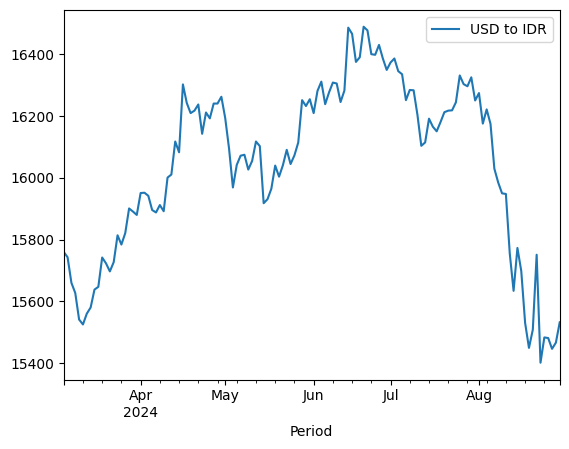

In [72]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='Period'>

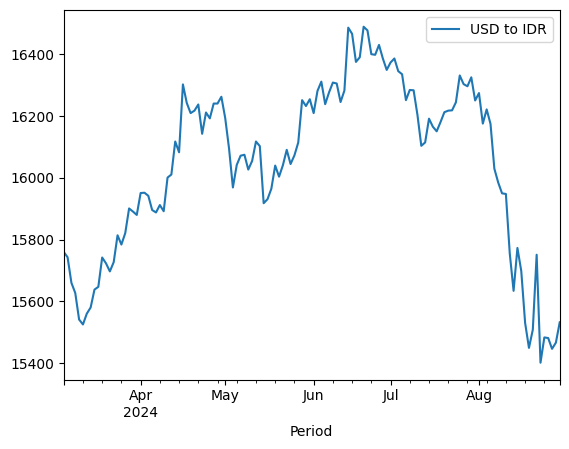

In [57]:
df.plot()

## Analysis

Based on the data above, we can see usd to idr from 2024-03-04 to 2024-03-12 went down.Then, the trend changed from 2024-03-12 to 2024-06-20 when the price was 16.490. This is the highest price between March and August 2024. After that, the price went down until 2024-08-30.

## conclusion

The graph went down from 2024-03-04 to 2024-03-12 or only 8 days. Then the trend went up for more than three months and reached the highset price at 16,490 on 2024-06-20. Finally, the trend went down again till 2024-08-30

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.